<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/week7/CNN_MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

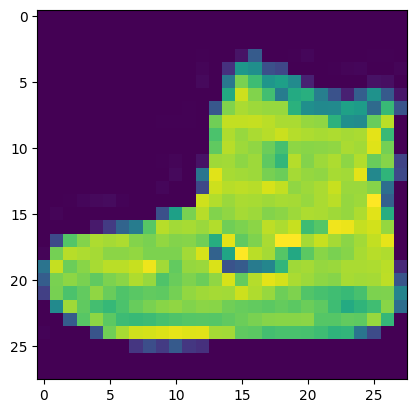

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[0])
plt.show()

In [38]:
# 2. 데이터 전처리

# reshape
X_train = X_train.reshape((60000, 28, 28, 1)) # 차원 추가 포함
X_test = X_test.reshape((10000, 28, 28, 1)) # 차원 추가 포함

# 정규화
X_train, X_test = X_train / 255.0, X_test / 255.0

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [39]:
# 3. CNN 모델 구성
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# 4. 컴파일
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
# 5. 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=2)

Epoch 1/10
422/422 - 7s - 15ms/step - accuracy: 0.7671 - loss: 0.6344 - val_accuracy: 0.8355 - val_loss: 0.4263
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.8605 - loss: 0.3900 - val_accuracy: 0.8727 - val_loss: 0.3518
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.8808 - loss: 0.3308 - val_accuracy: 0.8842 - val_loss: 0.3199
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.8922 - loss: 0.2953 - val_accuracy: 0.8907 - val_loss: 0.2934
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.9007 - loss: 0.2745 - val_accuracy: 0.8998 - val_loss: 0.2802
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9066 - loss: 0.2549 - val_accuracy: 0.9032 - val_loss: 0.2677
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9131 - loss: 0.2364 - val_accuracy: 0.9018 - val_loss: 0.2700
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9193 - loss: 0.2214 - val_accuracy: 0.8918 - val_loss: 0.2904
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9238 - loss: 0.2074 - val_accuracy: 0.9062 - val_loss: 0.2681


In [42]:
# 6. 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9011 - loss: 0.2804

Test accuracy: 0.9010999798774719


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


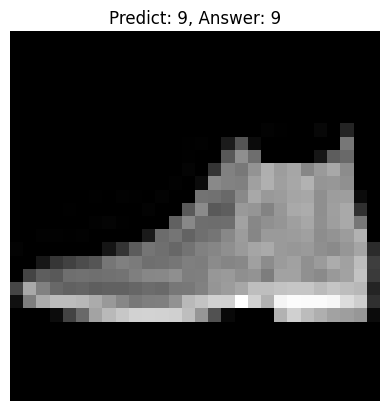

In [43]:
# 7. 예측 및 시각화
sample = X_test[0:1]
pred_probs = model.predict(sample)
pred_class = np.argmax(pred_probs[0])
true_class = np.argmax(y_test[0])

plt.imshow(sample[0].reshape(28, 28), cmap='gray')
plt.title(f"Predict: {pred_class}, Answer: {true_class}")
plt.axis('off')
plt.show()